**Deep Learning Micro Project**

**Name : G.Siva Ashok**

**Guide: Prof. R. Raja Subramanian**

**Description**

This is the python program for Face or any object detection using MobileNetV2 architecture, Tensorflow, cv2, Matplotlib for image showing

Here we will take dataset from kaggle and the dataset is mainly based on logos of various brands.

Finally we are training and validating as we get accuracy more than 85 then callback and prediction our custom image from testing set

In [ ]:
#Importing all required libraries
import tensorflow as tf
import cv2
import random 
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/logos1")

In [ ]:
resultant="/content/augmentedimages1"

In [ ]:
items = os.listdir(directory)

classes=[]
count=0
images = []
labels=[]
for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
    
    i1+=1
    while a!=0:
        img = cv2.rotate(img,lt[random.randint(0,2)])
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
        i1+=1
        labels.append(count)
        if a%2==0:
            img = brightness(img)
            images.append(img)
            cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
            i1+=1
            labels.append(count)
        a-=1
    count+=1
images = np.array(images) 
labels = np.array(labels)

abu-dhabi-logo.png
ac-cuneo-1905-vector-logo-400x400.png
adidas-black-vector-logo-400x400.png
advan-logo-vector-download.jpg
Adidas-Trefoil-logo-vector-for-free-download.png
adobe-eps-vector-logo-400x400.png
afc-champions-league-logo.png
Agribank-logo-400x400.png
airtel-logo-vector-400x400.png
all-blacks-eps-vector-logo-400x400.png
alipay-logo.png
alibaba-logo-png-400x400.png
allah-cellacelaluhu-vector-logo-400x400.png
alpina-eps-vector-logo-400x400.png
american-flag-logo-vector-400x400.png
amazon-alexa-logo.png
amazon-logo-vector-download-400x400.jpg
amazon-logo-preview-400x400.png
american-express-logo.png
android-vector-logo.png
android-robot-vector-400x400.jpg
apple-app-store-logo.png
apple-classic-rainbow-vector-logo-400x400.png
andhra-bank-vector-logo-400x400.png
apple-iphone-6s-logo-vector-download-400x400.jpg
apple-inc-vector-logo-400x400.png
apple-ios-logo-vector-download-400x400.jpg
apple-computer-vector-logo-400x400.png


In [ ]:
images.shape

(304, 224, 224, 3)

In [ ]:
# change the model here for alternatives

model = MobileNetV2(weights="imagenet")
for i in model.layers:
    i.trainable =  False

14536120/14536120 [==============================] - 1s 0us/step


In [ ]:
len(model.layers)

156

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
model2 = Sequential() 

# adding layers from pre-trained model
for i in range(18):
    model2.add(model.layers[i])

In [ ]:
# adding custum layers
model2.add(Flatten())
model2.add(Dense(900,activation="relu"))
model2.add(Dense(800,activation="relu"))
model2.add(Dense(731,activation="Softmax"))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 bn_Conv1 (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 Conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 expanded_conv_depthwise (De  (None, 112, 112, 32)     288       
 pthwiseConv2D)                                                  
                                                                 
 expanded_conv_depthwise_BN   (None, 112, 112, 32)     128       
 (BatchNormalization)                                            
                                                        

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .85):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(85))   
            self.model.stop_training = True
callbacks = myCallback()

**Training and Validation**

In [ ]:
# model1.summary()
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model2.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
10/10 [==============================] - 14s 1s/step - loss: 215.9742 - accuracy: 0.1645
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 69.0554 - accuracy: 0.5428
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 13.6572 - accuracy: 0.7632
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 4.2947 - accuracy: 0.8684call

Reached 85.00% accuracy, so stopping training!!
10/10 [==============================] - 12s 1s/step - loss: 4.2947 - accuracy: 0.8684


In [ ]:
model2.evaluate(images,labels)

10/10 [==============================] - 4s 401ms/step - loss: 1.3189 - accuracy: 0.9342


[1.3188976049423218, 0.9342105388641357]

In [ ]:
def predict(i,model,labels):
    path1 = "/content/drive/MyDrive/Testing Set/apple.png"
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(model.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (-5,20), cv2.FONT_HERSHEY_SIMPLEX,1, (200,200,0), 3, cv2.LINE_AA)
    plt.imshow(img)

**Output**

1/1 [==============================] - 0s 219ms/step


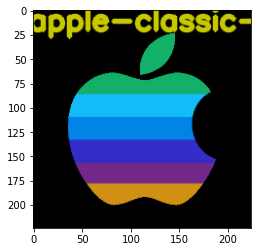

In [ ]:
predict("apple.png",model2,classes)